## Mini Project 3
Megan Gross

The problem in this project is to classify and predict the type of soil from pixels from images of neighbourhoods into one of seven classes. The pixels of the images were reduced to long rows of data with 36 columns and one label column.

Seven classes:
1.	Red soil
2.	Cotton crop
3.	Gray soil
4.	Damp gray soil
5.	Soil with vegetation stubble
6.	Mixture class (all types are present)
7.	Very damp gray soil

In this dataset there are no entries with a label of class 6. In this project 3,199 entries were used and there were no missing data values for any entries

Firstly, mount drive and navigate to folder containing data for this project.

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
cd /content/gdrive/MyDrive/Colab Notebooks/36_24650006_miniP3_AT2_notebook

/content/gdrive/MyDrive/Colab Notebooks/36_24650006_miniP3_AT2_notebook


Import the libraries needed to build the model. Numpy is used for mathematical operations used in calculations with performance metrics of the model. Pandas is used for reading in the csv filed containing the data. Tensorflow is used for importing keras which allows us to load and save the model we built, cutting down on time as we don't have to go through the tedious process of rebuilding the model everytime. Keras is also used for the layers of the MLP, specifically with the Dense and Dropout functions.  Matplotlib is used for plotting, specifically when showing the data spread and confusion matrix.  Sklearn is used for the Perceptron model, splitting the training and test data, and the performance metrics. 

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

from tensorflow import keras
from tensorflow.keras.models import load_model, save_model
from keras.layers import Dense, Dropout

Read in the csv data file, named 'soilPixelData'. The data file has a total of 3,199 rows and 37 columns of data.

In [39]:
dataFile=pd.read_csv('soilPixelData.csv',names=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30','x31','x32','x33','x34','x35','x36','y'])

Split the columns in the data file into two distinct parts: the input data and the output labels. In this case, columns 0-36 are the inputs, and column 37 (the last column in the file) is the output.

In [5]:
data=dataFile.iloc[:,0:36]
label=dataFile.iloc[:,-1]

Show the histogram of the spread of the 7 classes. From this data file, there is no Class 6 data.

(array([957., 444.,   0., 853.,   0., 375., 422.,   0.,   0., 948.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

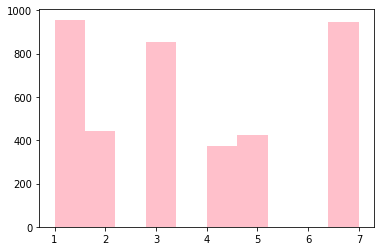

In [6]:
plt.hist(label, color='pink')

Use the train_test_split() function from Sklearn to split the data and labels into a traning data, training label, test data, and test label set. The test size should be set at 0.2, meaning that 20% of the data goes to testing. The random state is a fixed number (any number), and in this case is 30.

In [7]:
trainData, testData, trainLabels, testLabels=train_test_split(data, label, test_size = 0.2, random_state = 30)

The keras to_categorical() function can be used on the train and test labels to turn the output values to categorical values (binary numbers) so the model doesn't assume only two output values.

In [8]:
trainLabelEncoded=keras.utils.to_categorical(trainLabels, 8, dtype ="uint8")
testLabelEncoded=keras.utils.to_categorical(testLabels, 8, dtype ="uint8")

Create two data sets of data and labels to be used in the future for predictions. In this case, 4 rows are set aside, however any number of rows can be used depending on preference.  


In [9]:
futureSampleData=testData[-4:]
futureSampleLabel=testLabelEncoded[-4:]
futureSampleLabelClasses=testLabels[-4:]

In [10]:
testData=testData[:-4]
labelTesting=testLabelEncoded[:-4]
testLabels=testLabels[:-4]

Develop the FNN(MLP) model using the training data. This model has 4 neuron layers and epochs (number of passes of the entire training dataset the model has completed) is set at 50. 

In [11]:
inputDimensions=trainData.shape[1] 
neuron1=512            
neuron2=512            
neuron3=512 
neuron4=100           
epochs=50         

Compose the model and layers. Between each neuron layer, add a dropout layer that has a 20% of dropping data. 

In [12]:
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=(inputDimensions,)))
model.add(Dense(neuron1,activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(neuron2, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(neuron3,activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(neuron4,activation='relu'))
model.add(Dense(8, activation=tf.keras.activations.softmax))

Print a visual respresentation of the model layers. Also, using model.layers, print the number of layers. 

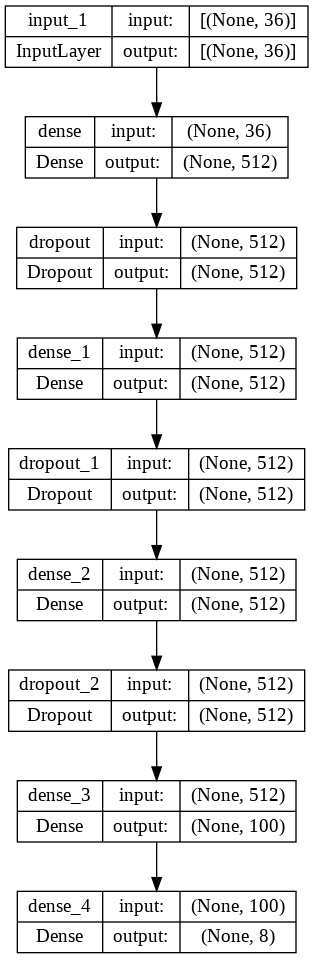

In [35]:
keras.utils.plot_model(model, show_shapes=True)

In [14]:
print (len(model.layers))

8


Compile the model!
Loss is set to categorical cross entropy which calculates the cross entropy between labels and predictions. It is used when there is more than 2 classes. 
Optimizer is set to adam which is a "stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments" (Keras documentation). Metrics is set to accuracy which calculates how often predictions equals the labels.

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Fit the model using the training data and previously encoded label. Set the epochs to the previously defined value. The batch size is how many computational inputs to deal with at one time and can be adjusted in accordance with the number of inputs. Verbose is set at 0, meaning we don't see the process of the model being fit. 

In [16]:
model.fit(trainData, trainLabelEncoded, epochs=epochs, batch_size=20, verbose=0)

In [17]:
predictions=model.predict(testData)
labelPrediction=(predictions > 0.5)*1

25/25 [==============================] - 0s 4ms/step


In [18]:
predictionFuture=model.predict(futureSampleData)
labelPredictionFuture=(predictionFuture > 0.5)*1

1/1 [==============================] - 0s 21ms/step
[[0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]]


The evaluate method from Keras returns the loss and accuracy for the model. 

In [19]:
scores=model.evaluate(testData, labelTesting, verbose = 0)
print(model.metrics_names)
print(scores)

['loss', 'accuracy']
[0.3097613453865051, 0.9158291220664978]


Accuracy measures how often the model’s prediction is correct. It is calculated by taking the number of correctly predicted results divided by the total number of results. A successful outcome for accuracy would be 90% or above, meaning that nine out of 10 times the model correctly predicted the image’s class. 

In [20]:
metrics.accuracy_score(labelTesting, labelPrediction)

0.914572864321608

Precision is how many accurately predicated cases turned out positive. It is calculated by the number of true positives divided by the number of predicted positive cases. If false positives are more of a concern than false negatives then precision is a helpful metric. 

In [21]:
metrics.precision_score(labelTesting, labelPrediction, average='weighted', zero_division=1)

0.9203841157730833

Recall is the number of actual positives predicted correctly divided by the total number of actual positives (true positive divided by true positive plus false negative). A perfect precision and recall score in 1.0.

In [22]:
metrics.recall_score(labelTesting, labelPrediction, average='weighted',zero_division=1)

0.914572864321608

The F1 score is the mean of precision and recall. It is effective in cases where the false positives and false negatives are equally costly, true negative is high, and adding more data does not effectively change the outcome. It is calculated by multiplying precision time recall and dividing it by precision plus recall. For the F1 score, it is considered perfect with a score of 1.0 meaning that there are low false positives and low false negatives. A total model failure would have a score of zero.

In [23]:
metrics.f1_score(labelTesting, labelPrediction, average='weighted',zero_division=1)

0.9165418298417534

In [24]:
labelPrediction=[np.argmax(y, axis=None, out=None) for y in labelPrediction]

A confusion matrix is a table of predicted values and actual values and displays how many were correctly or incorrectly identified. It has four categories: true positive, true negative, false positive and false negative. 

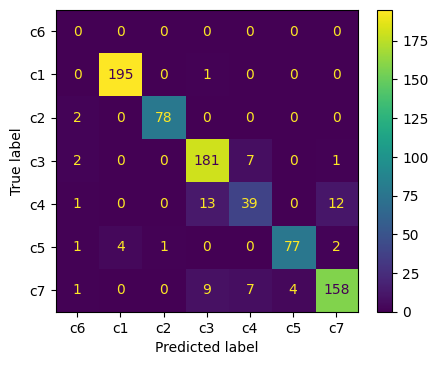

In [34]:
fig, ax=plt.subplots(figsize = (5,4), dpi = 100)
confMatrix=confusion_matrix(testLabels, labelPrediction)
cmp=ConfusionMatrixDisplay(confMatrix, display_labels = ['c6','c1', 'c2', 'c3','c4','c5','c7']) 
cmp.plot(ax=ax)

Print the classification report which gives an overview of each classes' precision, recall, f1 score, and data predicted. It also gives a macro average and weighted average for the summary of all classes.

Note: the "0" should be a "6" as it is the 6 class that has no predictions or data. 

In [26]:
print(metrics.classification_report(testLabels, labelPrediction, zero_division=1))

              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.98      0.99      0.99       196
           2       0.99      0.97      0.98        80
           3       0.89      0.95      0.92       191
           4       0.74      0.60      0.66        65
           5       0.95      0.91      0.93        85
           7       0.91      0.88      0.90       179

    accuracy                           0.91       796
   macro avg       0.78      0.90      0.77       796
weighted avg       0.92      0.91      0.92       796



Save the model so it does not need to be recomputed and waste time and power in the future. Load the saved model and print a summary of it.

In [27]:
model.save("multiClassClassification_model.h5")

In [28]:
loaded_model=load_model('multiClassClassification_model.h5')

In [29]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               18944     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               5

Use the futureSample_data to simulate a real-world application scenario 

In [30]:
predictionValue=loaded_model.predict(futureSampleData)
labelPredictionValue=(predictionValue > 0.5)*1

1/1 [==============================] - 0s 72ms/step
[[0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]]


The evaluate method from Keras returns the loss and accuracy for the model. 

In [31]:
validationScores=loaded_model.evaluate(futureSampleData, futureSampleLabel, verbose = 0)
print(model.metrics_names)
print(validationScores)

['loss', 'accuracy']
[0.24465340375900269, 0.75]


Convert the predicted label values from binary to decimal format.

In [32]:
finalLabelPrediction=[np.argmax(y, axis=None, out=None) for y in labelPredictionValue]

Print the predicted labels versus the actual labels.

In [33]:
print("The predicted labels: {} versus the true labels: {}".format(finalLabelPrediction, futureSampleLabelClasses.values))

The predicted labels: [5, 7, 7, 7] versus the true labels: [5 7 7 4]
